# Simplified Mathematical Model for the Formation of Null Singularities Inside Black Holes by Ori and Gorbonos
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  December 31, 2021 

Go back and construct stress energy tensor later

https://arxiv.org/abs/gr-qc/0612136

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
u,v,theta,phi,du,dv,dtheta,dphi = symbols( 'u v theta phi du dv dtheta dphi' ) 

In [39]:
f = Function('f')(u,v)
f

In [5]:
r = Function('r')(u,v)
r

In [6]:
variables = Matrix( [u,v,theta,phi] )
variables

⎡u⎤
⎢ ⎥
⎢v⎥
⎢ ⎥
⎢θ⎥
⎢ ⎥
⎣φ⎦

In [10]:
differentials = Matrix( [du,dv,dtheta,dphi] ) 
differentials

⎡  du  ⎤
⎢      ⎥
⎢  dv  ⎥
⎢      ⎥
⎢dtheta⎥
⎢      ⎥
⎣ dphi ⎦

In [11]:
lineElement = expand( -2*f*du*dv + r**2 * (dtheta**2 + sin(theta)**2 * dphi**2 )) 
lineElement

In [12]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡   0      -f(u, v)     0             0        ⎤
⎢                                              ⎥
⎢-f(u, v)     0         0             0        ⎥
⎢                                              ⎥
⎢                     2                        ⎥
⎢   0         0      r (u, v)         0        ⎥
⎢                                              ⎥
⎢                               2          2   ⎥
⎣   0         0         0      r (u, v)⋅sin (θ)⎦

In [13]:
import sympy

In [14]:
m = sympy.Array(g)
m

⎡   0      -f(u, v)     0             0        ⎤
⎢                                              ⎥
⎢-f(u, v)     0         0             0        ⎥
⎢                                              ⎥
⎢                     2                        ⎥
⎢   0         0      r (u, v)         0        ⎥
⎢                                              ⎥
⎢                               2          2   ⎥
⎣   0         0         0      r (u, v)⋅sin (θ)⎦

In [15]:
from einsteinpy.symbolic import *

In [16]:
syms = sympy.symbols("u v theta phi")
u,v,theta,phi = syms

In [17]:
metric = MetricTensor(m,syms)

In [18]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡                                                                                           
⎢⎡∂                                                               ⎤  ⎡0       0             
⎢⎢──(f(u, v))                                                     ⎥  ⎢                      
⎢⎢∂u                                                              ⎥  ⎢   ∂                  
⎢⎢───────────  0           0                        0             ⎥  ⎢   ──(f(u, v))        
⎢⎢  f(u, v)                                                       ⎥  ⎢   ∂v                 
⎢⎢                                                                ⎥  ⎢0  ───────────        
⎢⎢     0       0           0                        0             ⎥  ⎢     f(u, v)          
⎢⎢                                                                ⎥  ⎢                      
⎢⎢                        ∂                                       ⎥  ⎢                      
⎢⎢                r(u, v)⋅──(r(u, v))                             ⎥  ⎢

In [19]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡      ⎛            2                                   ⎞                                   
⎢      ⎜           ∂             ∂           ∂          ⎟              2                2   
⎢    2⋅⎜- f(u, v)⋅───(r(u, v)) + ──(f(u, v))⋅──(r(u, v))⎟             ∂                ∂    
⎢      ⎜            2            ∂u          ∂u         ⎟         2⋅─────(r(u, v))   ─────(f
⎢      ⎝          ∂u                                    ⎠           ∂v ∂u            ∂v ∂u  
⎢    ────────────────────────────────────────────────────       - ──────────────── - ───────
⎢                      f(u, v)⋅r(u, v)                                r(u, v)           f(u,
⎢                                                                                           
⎢                                                                                           
⎢                                                                     ⎛            2        
⎢       2                2                                            

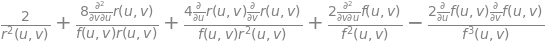

In [20]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [21]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                 ⎛            2            
⎢                                                                 ⎜           ∂             
⎢                                                               2⋅⎜- f(u, v)⋅───(r(u, v)) + 
⎢                                                                 ⎜            2            
⎢                                                                 ⎝          ∂u             
⎢                                                               ────────────────────────────
⎢                                                                                 f(u, v)⋅r(
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢    ⎛                2                                              2

In [22]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢     ⎡                                                               2                     
⎢     ⎢                                                              ∂              ∂       
⎢     ⎢                                                  - f(u, v)⋅─────(f(u, v)) + ──(f(u, 
⎢     ⎢                                                            ∂v ∂u            ∂u      
⎢     ⎢                       0                          ───────────────────────────────────
⎢     ⎢                                                                        2            
⎢     ⎢                                                               

In [23]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [24]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡              ⎛            2                                   ⎞                           
⎢              ⎜           ∂             ∂           ∂          ⎟                  ⎛        
⎢            2⋅⎜- f(u, v)⋅───(r(u, v)) + ──(f(u, v))⋅──(r(u, v))⎟                  ⎜        
⎢              ⎜            2            ∂u          ∂u         ⎟              1.0⋅⎜1.0⋅f(u,
⎢              ⎝          ∂u                                    ⎠                  ⎝        
⎢            ────────────────────────────────────────────────────              ─────────────
⎢                              f(u, v)⋅r(u, v)                                              
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢    ⎛                             2                                  

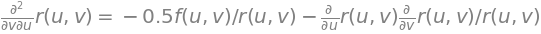

In [45]:
equation3 = expand( Eq( diff(r,u,v) , solve( einsteinSimplified[1,0].args[2] , diff(r,u,v) )[0] ) ) 
equation3

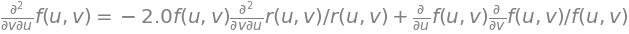

In [43]:
Eq( diff(f,u,v) ,  solve ( einsteinSimplified[2,2].args[2] , diff(f,u,v) )[0] ) 

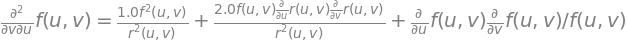

In [50]:
equation4 = expand( Eq( diff(f,u,v) ,  solve ( einsteinSimplified[2,2].args[2] , diff(f,u,v) )[0] ).subs(equation3.args[0],equation3.args[1]) ) 
equation4

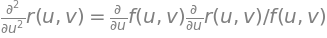

In [54]:
equation5a =Eq(diff(r,u,u) , solve( einsteinSimplified[0,0] , diff(r,u,u) )[0] ) 
equation5a

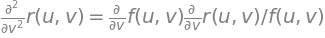

In [44]:
equation5b = Eq( diff(r,v,v) , solve( einsteinSimplified[1,1].args[3] , diff(r,v,v) )[0]  ) 
equation5b

In [56]:
vacuumFieldEquations = Matrix([equation3,equation4,equation5a,equation5b])
vacuumFieldEquations

⎡                                                   ∂           ∂                           
⎢                     2                             ──(r(u, v))⋅──(r(u, v))                 
⎢                    ∂                0.5⋅f(u, v)   ∂u          ∂v                          
⎢                  ─────(r(u, v)) = - ─────────── - ───────────────────────                 
⎢                  ∂v ∂u                r(u, v)             r(u, v)                         
⎢                                                                                           
⎢                                            ∂           ∂             ∂           ∂        
⎢   2                  2         2.0⋅f(u, v)⋅──(r(u, v))⋅──(r(u, v))   ──(f(u, v))⋅──(f(u, v
⎢  ∂              1.0⋅f (u, v)               ∂u          ∂v            ∂u          ∂v       
⎢─────(f(u, v)) = ──────────── + ─────────────────────────────────── + ─────────────────────
⎢∂v ∂u               2                          2                     